In [2]:
# Source code for paper "Learning modular robot control policies" in Transactions on Robotics
# Julian Whitman, Dec. 2022. 
## This script reads the zero shot transfer test data and plots out the number of legs and wheels vs the transfer success 

import numpy as np
import torch
import matplotlib.pyplot as plt
import os

font = {'family':'serif', 'serif': ['Times New Roman']}
plt.rc('font',**font)

fnames = [ # Note these paths may have gotten changed during refactor
    '../modular_policy/saved/with_tripod1/zero_shot_data/transfer_results.ptx',
    'saved/mbrl_hc1/zero_shot_data/transfer_results.ptx']

labels = ['Modular GNN', 'Hardware-conditioned MLP']
# for key in data:
#     print(key)

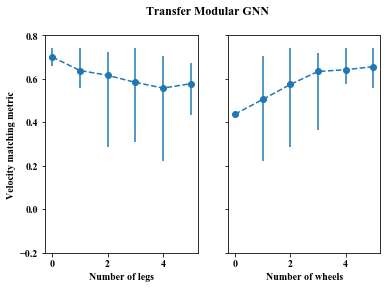

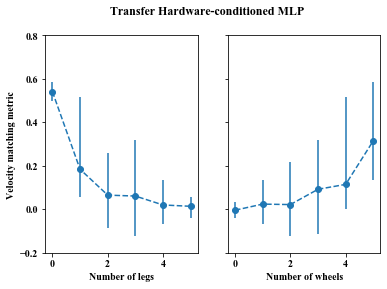

In [3]:
for i_file in range(len(fnames)):
    fname=  fnames[i_file]
    folder = os.path.dirname(fname)
    data = torch.load(fname)
    vb = np.array(data['vel_baseline_list'])
    v = np.array(data['vel_metric_list'])
    metric_all = (vb-v)/vb
    metric_seen1 = metric_all[data['seen_inds']]
    metric_unseen1 = metric_all[data['unseen_inds']]

    v_legs = [list() for i in range(6)]
    v_wheels = [list() for i in range(6)]
    for i in data['unseen_inds']:
        urdf = data['urdf_names'][i]
        v = metric_all[i]
        n_legs = urdf.count('l')
        v_legs[n_legs].append(v)
        n_wheels = urdf.count('w')
        v_wheels[n_wheels].append(v)

    fig, axs = plt.subplots(1, 2, sharey=True)
    plt.suptitle('Transfer ' + labels[i_file])
    v_mean = np.array([np.mean(v) for v in v_legs])
    v_min = np.array([np.min(v) for v in v_legs])
    v_max = np.array([np.max(v) for v in v_legs])
    error = [v_mean-v_min,v_max-v_mean]
    axs[0].errorbar(list(range(len(v_mean))), v_mean, yerr=error, fmt='--o')
    axs[0].set_ylabel('Velocity matching metric')
    axs[0].set_xlabel('Number of legs')
    axs[0].set_ylim([-0.2,0.8])

    v_mean = np.array([np.mean(v) for v in v_wheels])
    v_min = np.array([np.min(v) for v in v_wheels])
    v_max = np.array([np.max(v) for v in v_wheels])
    error = [v_mean-v_min,v_max-v_mean]
    axs[1].errorbar(list(range(len(v_mean))), v_mean, yerr=error, fmt='--o')
    axs[1].set_xlabel('Number of wheels')

    plt.show()


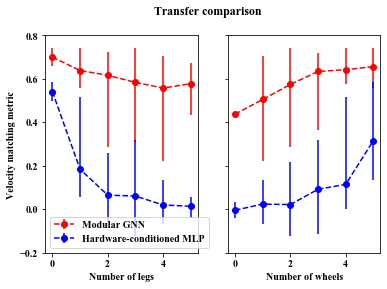

created transfer_compare.pdf


In [4]:
colors = ['r', 'b']
fig, axs = plt.subplots(1, 2, sharey=True)

for i_file in range(len(fnames)):
    fname=  fnames[i_file]
    folder = os.path.dirname(fname)
    data = torch.load(fname)
    vb = np.array(data['vel_baseline_list'])
    v = np.array(data['vel_metric_list'])
    metric_all = (vb-v)/vb
    metric_seen1 = metric_all[data['seen_inds']]
    metric_unseen1 = metric_all[data['unseen_inds']]

    v_legs = [list() for i in range(6)]
    v_wheels = [list() for i in range(6)]
    for i in data['unseen_inds']:
        urdf = data['urdf_names'][i]
        v = metric_all[i]
        n_legs = urdf.count('l')
        v_legs[n_legs].append(v)
        n_wheels = urdf.count('w')
        v_wheels[n_wheels].append(v)

    plt.suptitle('Transfer comparison')
    v_mean = np.array([np.mean(v) for v in v_legs])
    v_min = np.array([np.min(v) for v in v_legs])
    v_max = np.array([np.max(v) for v in v_legs])
    error = [v_mean-v_min,v_max-v_mean]
    axs[0].errorbar(list(range(len(v_mean))), v_mean, yerr=error, fmt='--o', color=colors[i_file])
    axs[0].set_ylabel('Velocity matching metric')
    axs[0].set_xlabel('Number of legs')
    axs[0].set_ylim([-0.2,0.8])

    v_mean = np.array([np.mean(v) for v in v_wheels])
    v_min = np.array([np.min(v) for v in v_wheels])
    v_max = np.array([np.max(v) for v in v_wheels])
    error = [v_mean-v_min,v_max-v_mean]
    axs[1].errorbar(list(range(len(v_mean))), v_mean, yerr=error, fmt='--o', color=colors[i_file])
    axs[1].set_xlabel('Number of wheels')

axs[0].legend(labels,loc='lower left')
plt.show()

# Save to pdf
file_out = 'transfer_compare.pdf'
fig.savefig(file_out , bbox_inches='tight')
print('created ' + file_out)